# not finished yet

In [1]:
from data_analysis import DataAnalysis
import os
import matplotlib.pyplot as plt
import nltk
import numpy as np
from data_analysis_liln import DataAnalysis2, get_filepath, get_dataset

## 1. basic analysis

In [2]:
filepath1=get_filepath('pap','binary','train')
filepath2=get_filepath('pap','binary','dev')
filepath3=get_filepath('pap','binary','test')
filepath4=get_filepath('pep-3k','','train')
filepath5=get_filepath('pep-3k','','dev')
filepath6=get_filepath('pep-3k','','test')

In [3]:
data_set1=get_dataset(filepath1)
data_set2=get_dataset(filepath2)
data_set3=get_dataset(filepath3)
data_set4=get_dataset(filepath4)
data_set5=get_dataset(filepath5)
data_set6=get_dataset(filepath6)

get file from: /home/linux1/BOX/modeling_sematic_23w/Modeling_Semantic_Plausibility/Data/pap/train-dev-test-split/binary/train.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/Modeling_Semantic_Plausibility/Data/pap/train-dev-test-split/binary/dev.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/Modeling_Semantic_Plausibility/Data/pap/train-dev-test-split/binary/test.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/Modeling_Semantic_Plausibility/Data/pep-3k/train-dev-test-split/train.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/Modeling_Semantic_Plausibility/Data/pep-3k/train-dev-test-split/dev.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/Modeling_Semantic_Plausibility/Data/pep-3k/train-dev-test-split/test.csv


In [4]:
data_set_com1=get_dataset(filepath1,filepath2,filepath3)
data_set_com2=get_dataset(filepath4,filepath5,filepath6)

get file from: /home/linux1/BOX/modeling_sematic_23w/Modeling_Semantic_Plausibility/Data/pap/train-dev-test-split/binary/train.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/Modeling_Semantic_Plausibility/Data/pap/train-dev-test-split/binary/dev.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/Modeling_Semantic_Plausibility/Data/pap/train-dev-test-split/binary/test.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/Modeling_Semantic_Plausibility/Data/pep-3k/train-dev-test-split/train.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/Modeling_Semantic_Plausibility/Data/pep-3k/train-dev-test-split/dev.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/Modeling_Semantic_Plausibility/Data/pep-3k/train-dev-test-split/test.csv


In [5]:
print('pap:number of rows and columns, number of classes')
print('train:',data_set1.dataset_statistics(),data_set1.classes_num)
print('dev:',data_set2.dataset_statistics(), data_set2.classes_num)
print('test:',data_set3.dataset_statistics(), data_set3.classes_num)
print('total:',data_set_com1.dataset_statistics(), data_set_com1.classes_num)
print('pep_3k:number of rows and columns, number of classes')
print('train:',data_set4.dataset_statistics(), data_set4.classes_num)
print('dev:',data_set5.dataset_statistics(), data_set5.classes_num)
print('test:',data_set6.dataset_statistics(), data_set6.classes_num)
print('total:',data_set_com2.dataset_statistics(), data_set_com2.classes_num)

pap:number of rows and columns, number of classes
train: (1728, 2) {'0': 861, '1': 867}
dev: (216, 2) {'0': 110, '1': 106}
test: (216, 2) {'0': 109, '1': 107}
total: (2160, 2) {'0': 1080, '1': 1080}
pep_3k:number of rows and columns, number of classes
train: (2449, 2) {'0': 1227, '1': 1222}
dev: (306, 2) {'0': 153, '1': 153}
test: (307, 2) {'0': 154, '1': 153}
total: (3062, 2) {'0': 1534, '1': 1528}


# 1. tokens (word counts)

In [6]:
print('pap:total_tokens, num_unique_tokens')
print('train:',len(data_set1.all_tokens),data_set1.num_unique_tokens)
print('dev:',len(data_set2.all_tokens),data_set2.num_unique_tokens)
print('test:',len(data_set3.all_tokens),data_set3.num_unique_tokens)
print('total:',len(data_set_com1.all_tokens),data_set_com1.num_unique_tokens)
print('pep_3k:total_tokens,num_unique_tokens')
print('train:',len(data_set4.all_tokens),data_set4.num_unique_tokens)
print('dev:',len(data_set5.all_tokens),data_set5.num_unique_tokens)
print('test:',len(data_set6.all_tokens),data_set6.num_unique_tokens)
print('total:',len(data_set_com2.all_tokens),data_set_com2.num_unique_tokens)

pap:total_tokens, num_unique_tokens
train: 5184 2460
dev: 648 553
test: 648 544
total: 6480 2749
pep_3k:total_tokens,num_unique_tokens
train: 7347 561
dev: 918 330
test: 921 315
total: 9186 584


### tokens number

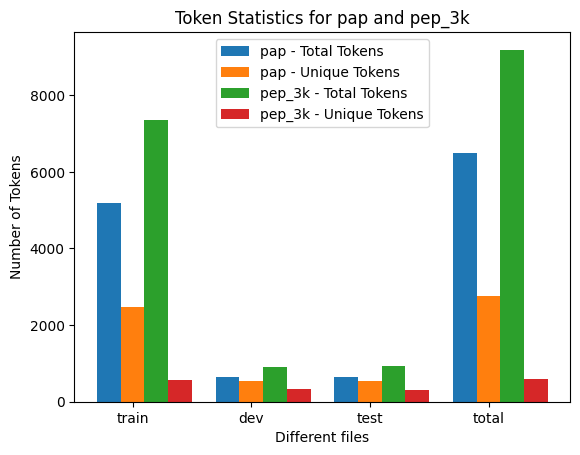

In [7]:
# Draw the bar chart for token statistics
# Data for pap
pap_data = {
    'train': {'total_tokens': 5184, 'num_unique_tokens': 2460},
    'dev': {'total_tokens': 648, 'num_unique_tokens': 553},
    'test': {'total_tokens': 648, 'num_unique_tokens': 544},
    'total': {'total_tokens': 6480, 'num_unique_tokens': 2749}
}

# Data for pep_3k
pep_3k_data = {
    'train': {'total_tokens': 7347, 'num_unique_tokens': 561},
    'dev': {'total_tokens': 918, 'num_unique_tokens': 330},
    'test': {'total_tokens': 921, 'num_unique_tokens': 315},
    'total': {'total_tokens': 9186, 'num_unique_tokens': 584}
}

categories = list(pap_data.keys())
pap_total_tokens = [pap_data[category]['total_tokens'] for category in categories]
pap_unique_tokens = [pap_data[category]['num_unique_tokens'] for category in categories]

pep_3k_total_tokens = [pep_3k_data[category]['total_tokens'] for category in categories]
pep_3k_unique_tokens = [pep_3k_data[category]['num_unique_tokens'] for category in categories]

bar_width = 0.20
index = np.arange(len(categories))

fig, ax = plt.subplots()

bar1 = ax.bar(index - bar_width, pap_total_tokens, bar_width, label='pap - Total Tokens')
bar2 = ax.bar(index , pap_unique_tokens, bar_width, label='pap - Unique Tokens')

bar3 = ax.bar(index+bar_width/2, pep_3k_total_tokens, bar_width, label='pep_3k - Total Tokens', align='edge')
bar4 = ax.bar(index + bar_width*1.5, pep_3k_unique_tokens, bar_width, label='pep_3k - Unique Tokens', align='edge')

ax.set_xlabel('Different files')
ax.set_ylabel('Number of Tokens')
ax.set_title('Token Statistics for pap and pep_3k')
ax.set_xticks(index)
ax.set_xticklabels(categories)
ax.legend()

plt.show()


###
The total number of tokens of pap is less than the training set of pep-3k, but the number of unique tokens of pap is more than that of pep-3k.  

It shows that there are more repeated words in pep-3k.

### tokens distribution

In [8]:
-----------

SyntaxError: invalid syntax (353815310.py, line 1)

## 2.POS

#### 2.1 unigram pos

In [9]:
print('pap:unique_pos')
print(len(data_set1.unique_pos)) #18
print(len(data_set2.unique_pos)) #12
print(len(data_set3.unique_pos)) #12
print(len(data_set_com1.unique_pos))
print('pep_3k:unique_pos')
print(len(data_set4.unique_pos)) #17
print(len(data_set5.unique_pos)) #14
print(len(data_set6.unique_pos)) #12
print(len(data_set_com2.unique_pos))

pap:unique_pos
18
12
12
18
pep_3k:unique_pos
17
14
12
18


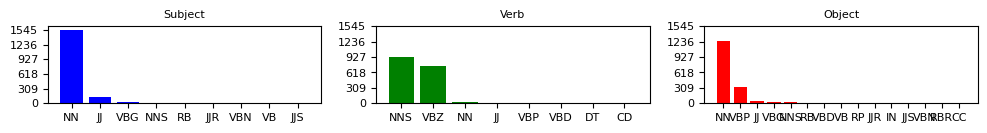

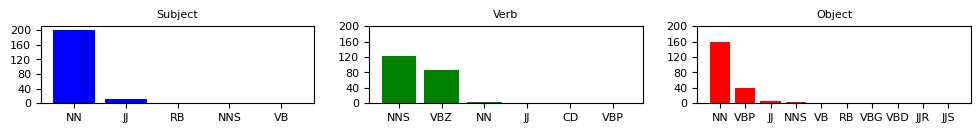

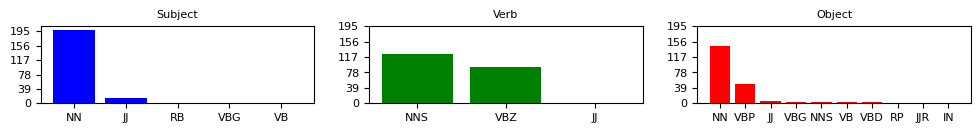

In [10]:
data_set1.plot_pos_uni_distribution()
data_set2.plot_pos_uni_distribution()
data_set3.plot_pos_uni_distribution()

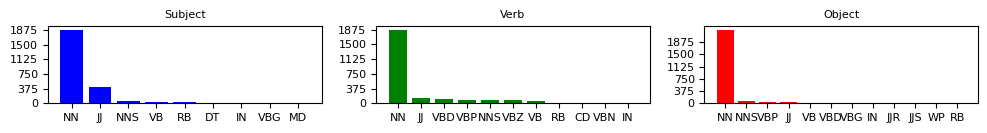

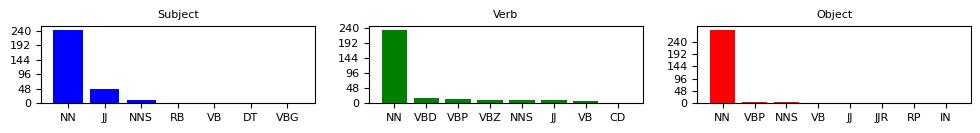

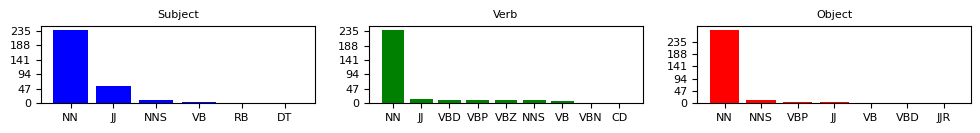

In [11]:
data_set4.plot_pos_uni_distribution()
data_set5.plot_pos_uni_distribution()
data_set6.plot_pos_uni_distribution()

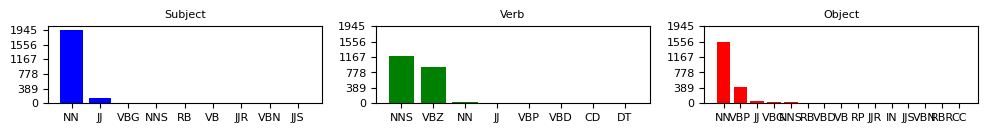

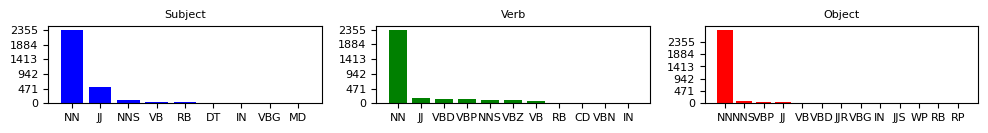

In [12]:
data_set_com1.plot_pos_uni_distribution()
data_set_com2.plot_pos_uni_distribution()

#### 2.2 bigram pos

In [13]:
pos1=data_set1.pos_bigrams_counts
pos2=data_set2.pos_bigrams_counts
pos3=data_set3.pos_bigrams_counts
pos4=data_set4.pos_bigrams_counts
pos5=data_set5.pos_bigrams_counts
pos6=data_set6.pos_bigrams_counts
pos_com1=data_set_com1.pos_bigrams_counts
pos_com2=data_set_com2.pos_bigrams_counts

In [14]:
#draw the dotted line graph for pos bigram statistics
def plot_bigram_n_distribution(pos1,pos2,pos3,pos_com1,n):
    pos_com1_ten=list(pos_com1.keys())[:n]
    def get_v(source,target):
        v=[]
        for i in target:
            if i in source:
                v.append(source[i])
            else:
                v.append(0)
        return v

    com_data = {
        'total': get_v(pos_com1,pos_com1_ten),
        'train': get_v(pos1,pos_com1_ten),
        'dev': get_v(pos2,pos_com1_ten),
        'test': get_v(pos3,pos_com1_ten),
    }
    labels = [str(i) for i in range(1, 11)]  # Assuming the bigrams are labeled from 1 to 10

    fig, ax = plt.subplots(figsize=( 6, 3))
    x = range(len(labels))

    for split, counts in com_data.items():
        ax.plot(
            x,
            counts,
            marker='o',
            linestyle='--',
            label=split
        )

    ax.set_xticks(x)
    ax.set_xticklabels(pos_com1_ten, rotation=45, ha="right")
    ax.set_xlabel('Bigram')
    ax.set_ylabel('Count')
    ax.set_title('Bigram Distribution')
    ax.legend()

    plt.tight_layout()
    plt.show()


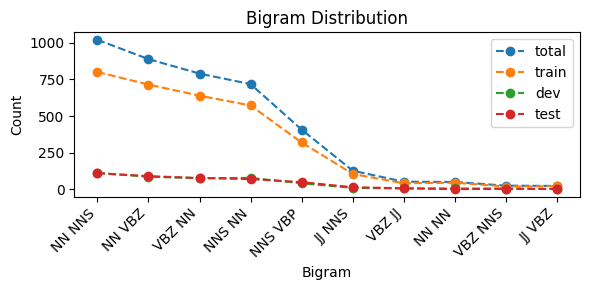

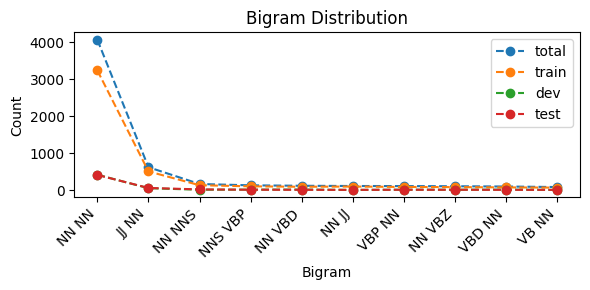

In [15]:
plot_bigram_n_distribution(pos1,pos2,pos3,pos_com1,10)
plot_bigram_n_distribution(pos4,pos5,pos6,pos_com2,10)

## 3. abstractness